In [49]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import preprocessing, neighbors, grid_search, cross_validation, linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
import cross_validation.train_test_split

In [5]:
df = pd.read_csv(os.path.join('..', 'datasets', 'abalone.csv'))

In [6]:
df

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex              4177 non-null object
Length           4177 non-null float64
Diameter         4177 non-null float64
Height           4177 non-null float64
WholeWeight      4177 non-null float64
ShuckedWeight    4177 non-null float64
VisceraWeight    4177 non-null float64
ShellWeight      4177 non-null float64
Rings            4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [80]:
df.var()

Length            0.014422
Diameter          0.009849
Height            0.001750
WholeWeight       0.240481
ShuckedWeight     0.049268
VisceraWeight     0.012015
ShellWeight       0.019377
Rings            10.395266
dtype: float64

In [33]:
df.corr()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
WholeWeight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
ShuckedWeight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
VisceraWeight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
ShellWeight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [14]:
X = df.drop("Sex", axis= 1)

In [15]:
X

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [18]:
y = df.Sex

In [19]:
y

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, dtype: object

In [22]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
print len(X_train)
print len(X_test)
print len(y_train)
print len(y_test)

3341
836
3341
836


In [27]:
X_train.corr()
#we choose to not use diameter 

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Length,1.000000,0.986626,0.809545,0.925283,0.898074,0.901923,0.896668,0.551926
Diameter,0.986626,1.000000,0.815144,0.924761,0.892732,0.898102,0.903953,0.569614
Height,0.809545,0.815144,1.000000,0.802585,0.761996,0.780910,0.799362,0.533590
WholeWeight,0.925283,0.924761,0.802585,1.000000,0.969501,0.965920,0.953238,0.535350
ShuckedWeight,0.898074,0.892732,0.761996,0.969501,1.000000,0.932480,0.879739,0.414353
VisceraWeight,0.901923,0.898102,0.780910,0.965920,0.932480,1.000000,0.904726,0.496502
ShellWeight,0.896668,0.903953,0.799362,0.953238,0.879739,0.904726,1.000000,0.625154
Rings,0.551926,0.569614,0.533590,0.535350,0.414353,0.496502,0.625154,1.000000


In [42]:
color = df.Sex.map({'M': 'red', 'F': 'green', 'I': 'blue'})

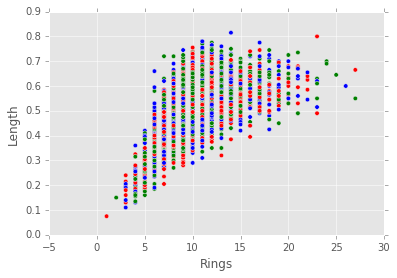

In [46]:
X_train.plot(x = 'Rings', y = 'Length', kind = 'scatter', c = color)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e56a9d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e2a6150>]], dtype=object)

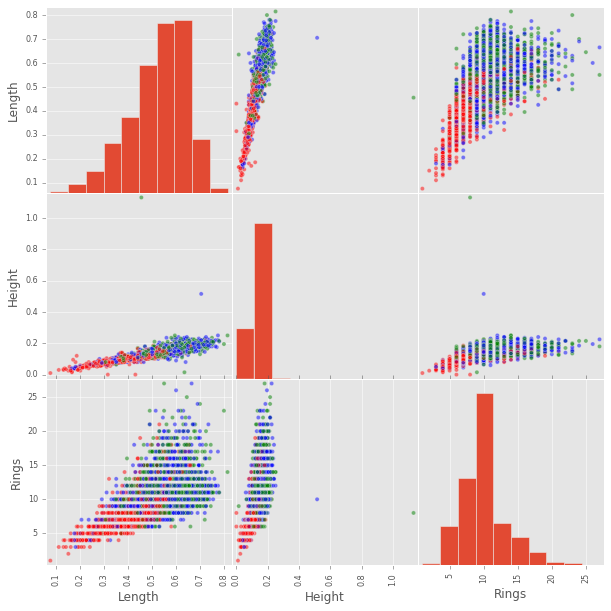

In [47]:
color_wheel = {"I": "red", 
               "M": "blue", 
               "F": "green"}
color = y_train.map(color_wheel)
pd.tools.plotting.scatter_matrix(X_train[['Length', 'Height', 'Rings']], c=color, s=70, figsize = (10,10))

In [67]:
feature = X_train[['Height', 'Length','Rings', 'WholeWeight' ]]
c = y_train

model = linear_model.LogisticRegression().\
    fit(feature, c)

In [68]:
model.score(feature, c)

0.54265190062855428

In [63]:
c_hat = model.predict(feature)
 
pd.crosstab(c_hat,  c,
   rownames = ['Hypothesized Class'],
   colnames = ['True Class'])

True Class,F,I,M
Hypothesized Class,,,
F,70,7,64
I,186,858,283
M,802,186,885


In [73]:
feature_2 = X_train
c = y_train

model = linear_model.LogisticRegression().\
   fit(feature_2, c)
   
model.score(features_2, c)

0.55402574079616884

In [74]:
c_hat = model.predict(feature_2)
 
pd.crosstab(c_hat,  c,
   rownames = ['Hypothesized Class'],
   colnames = ['True Class'])

True Class,F,I,M
Hypothesized Class,,,
F,257,32,215
I,185,863,286
M,616,156,731


In [75]:
cs = pd.get_dummies(c, prefix = None)

In [76]:
cs

,F,I,M
3141,0.0,1.0,0.0
3521,0.0,1.0,0.0
883,0.0,0.0,1.0
3627,0.0,0.0,1.0
2106,0.0,0.0,1.0
...,...,...,...
1033,0.0,0.0,1.0
3264,1.0,0.0,0.0
1653,0.0,0.0,1.0
2607,1.0,0.0,0.0
